In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# GR ICC Data
df = pd.read_csv('/Users/ericron/Desktop/DUSP1_Modeling/GR_TimeConcSweep/processed_dataframes/GR_ICC_TimeConcSweep_total.csv')

# # Add column of Nuclear Fraction 

# # Calculate the nuclear_fraction
# df['nuclear_fraction'] = df['nuc_intensity'] / (df['nuc_intensity'] + df['cyto_intensity'])

# Data Normalization

Mean Normalization: 

In [2]:
# # Mean Normalization:
# grouped = df.groupby(['Dex_Conc', 'time_index']) 
# normalized_df = df.copy()
# normalized_df['normalized_nuc_intensity'] = grouped['nuc_intensity'].transform(lambda x: x / x.mean())
# normalized_df['normalized_cyto_intensity'] = grouped['cyto_intensity'].transform(lambda x: x / x.mean())

# # Corrected nuclear fraction calculation using normalized values
# normalized_df['Normalized_nuclear_fraction'] = normalized_df['normalized_nuc_intensity'] / \
#     (normalized_df['normalized_nuc_intensity'] + normalized_df['normalized_cyto_intensity'])




MinMax Normalization:

In [3]:
# Efficient normalization using groupby and transform for MinMax scaling
grouped = df.groupby(['Dex_Conc', 'time_index']) 
normalized_df = df.copy()

# Applying MinMax normalization to nuclear intensity
normalized_df['normalized_nuc_intensity'] = grouped['nuc_intensity'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()))

# Applying MinMax normalization to cytoplasmic intensity
normalized_df['normalized_cyto_intensity'] = grouped['cyto_intensity'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()))

# Corrected nuclear fraction calculation using normalized values
normalized_df['Normalized_nuclear_fraction'] = normalized_df['normalized_nuc_intensity'] / \
    (normalized_df['normalized_nuc_intensity'] + normalized_df['normalized_cyto_intensity'])



Z-score Normalization

In [4]:
# # Efficient normalization using groupby and transform for Z-score normalization
# grouped = df.groupby(['Dex_Conc', 'time_index']) 
# normalized_df = df.copy()

# # Applying Z-score normalization to nuclear intensity
# normalized_df['normalized_nuc_intensity'] = grouped['nuc_intensity'].transform(
#     lambda x: (x - x.mean()) / x.std())

# # Applying Z-score normalization to cytoplasmic intensity
# normalized_df['normalized_cyto_intensity'] = grouped['cyto_intensity'].transform(
#     lambda x: (x - x.mean()) / x.std())

# # Corrected nuclear fraction calculation using normalized values
# normalized_df['Normalized_nuclear_fraction'] = normalized_df['normalized_nuc_intensity'] / \
#     (normalized_df['normalized_nuc_intensity'] + normalized_df['normalized_cyto_intensity'])


## GR Plots

1) Histograms of Nuclear, Cytoplasmic and Nuclear fraction 
2) Line Plots of Nuclear, Cytoplasmic and Nuclear fraction vs time
3) Histograms of Nuclear Fraction vs concnetration & time
4) Proprotions of High, Medium, and low Localization stacked plots 

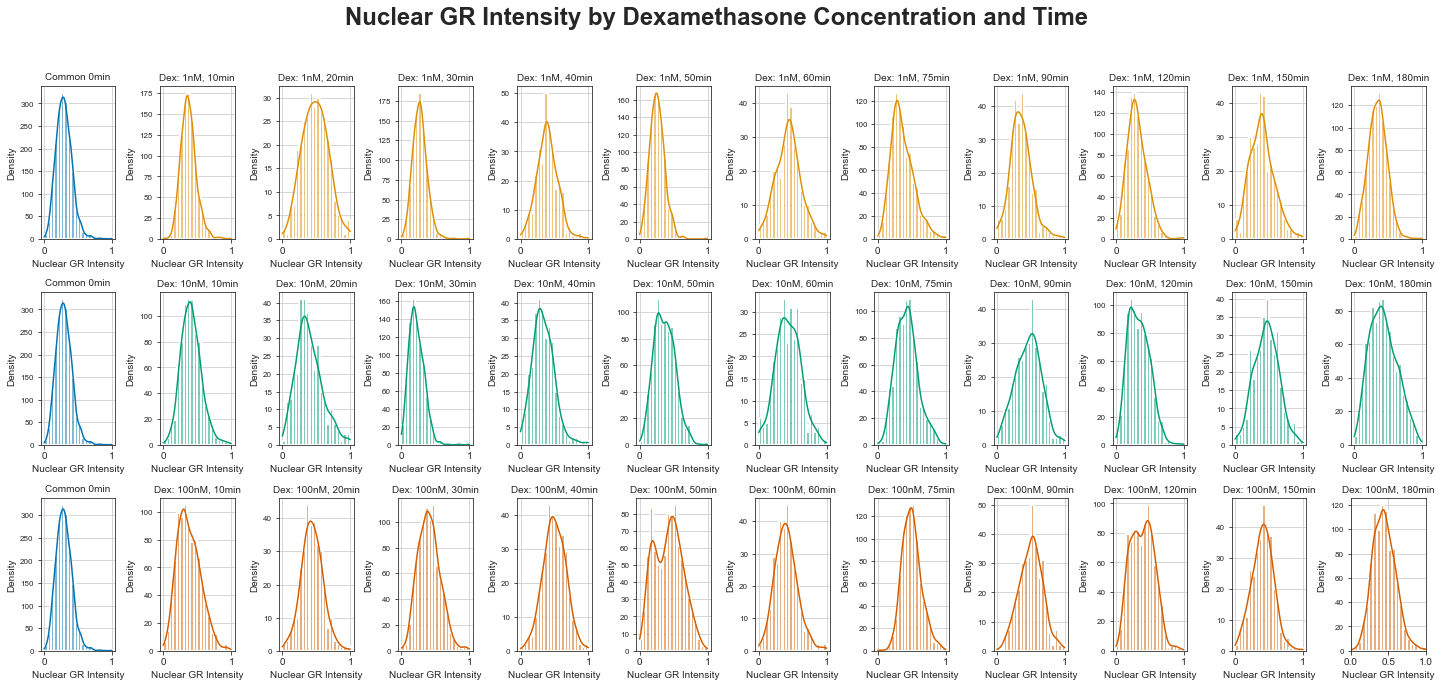

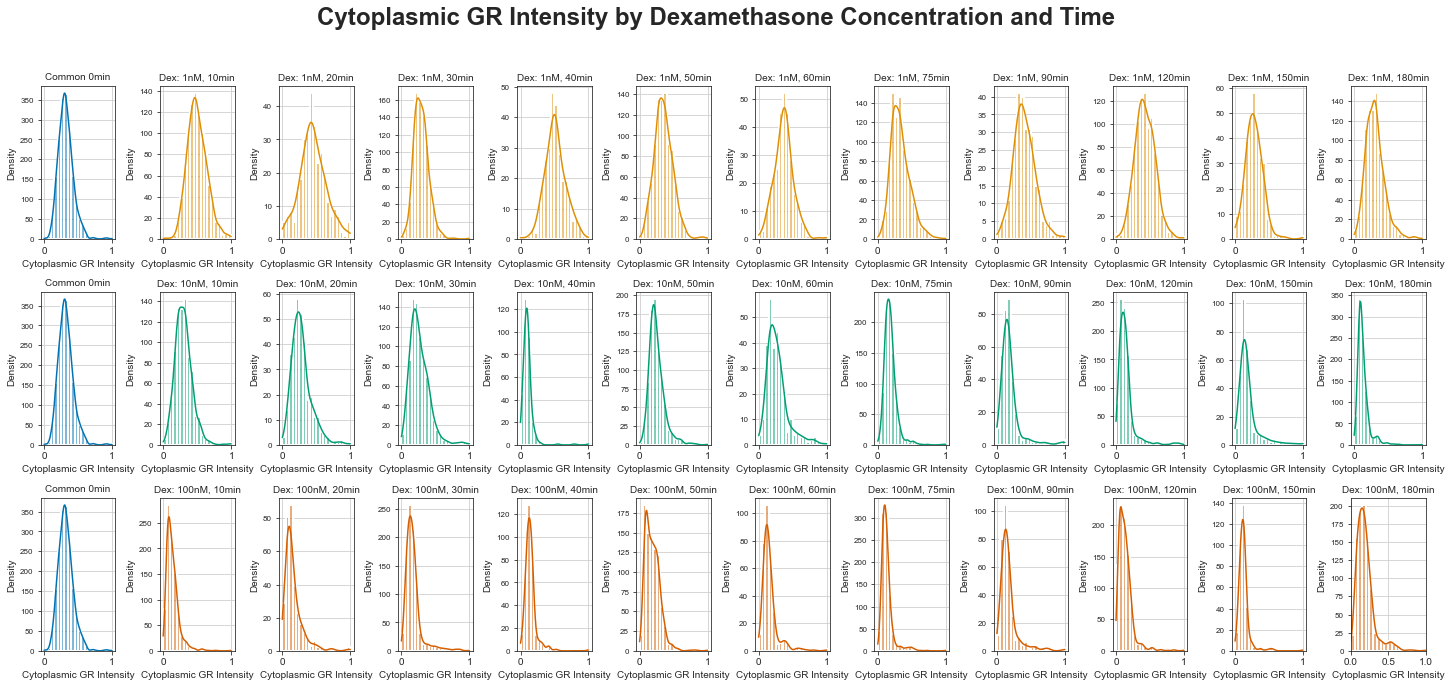

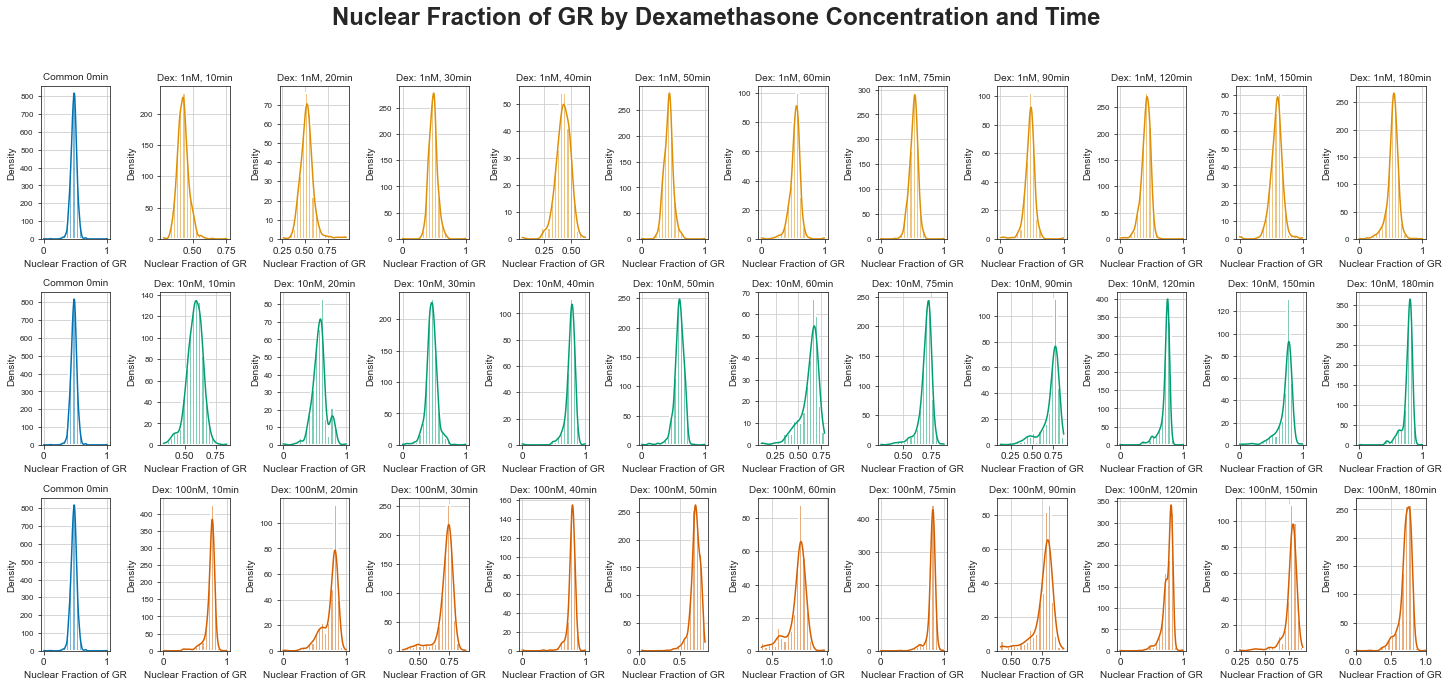

In [5]:
## GR Histograms for 'nuc_intensity', 'cyto_intensity', 'nuc_cyto_ratio', and 'nuclear_fraction' ##

# Set the Seaborn style
sns.set_style("ticks")

# Define the number of unique concentrations you have (including the common 0 concentration)
num_concentrations = 4  # 0, 1, 10, 100

# Get unique values for time_index and count them for num_cols
unique_time_indices = normalized_df['time_index'].unique()
num_cols = len(unique_time_indices)

# Since we are plotting 3 concentrations (1, 10, 100) 
num_rows = 3

# Generate colors from the Seaborn colorblind palette
colors = sns.color_palette("colorblind", num_concentrations)

# Map these colors to your concentrations
concentration_color_map = dict(zip([0, 1, 10, 100], colors))

# Get unique values for time_index
unique_time_indices = normalized_df['time_index'].unique()

# Concentrations to plot (excluding 0, as it will be included as the first timepoint)
concentrations = [1, 10, 100]

# Metrics to plot and their corresponding labels
metrics = ['normalized_nuc_intensity', 'normalized_cyto_intensity', 'Normalized_nuclear_fraction']
labels = {
    'normalized_nuc_intensity': 'Nuclear GR Intensity',
    'normalized_cyto_intensity': 'Cytoplasmic GR Intensity',
    'Normalized_nuclear_fraction': 'Nuclear Fraction of GR'
}

# Define the number of unique concentrations and time indices
num_concentrations = 3  # 0, 1, 10, 100
unique_time_indices = normalized_df['time_index'].unique()
num_cols = len(unique_time_indices)
num_rows = num_concentrations

# Loop over each metric and create a separate plot
for metric in metrics:
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust the figure size as needed

    for i, conc in enumerate(concentrations):
        for j, time_index in enumerate(unique_time_indices):
            if j == 0:
                data_subset = normalized_df[(normalized_df['Dex_Conc'] == 0) & (normalized_df['time_index'] == 0)]
                color = concentration_color_map[0]
            else:
                data_subset = normalized_df[(normalized_df['Dex_Conc'] == conc) & (normalized_df['time_index'] == time_index)]
                color = concentration_color_map[conc]

            ax = axes[i, j]
            sns.histplot(data=data_subset, x=metric, kde=True, color=color, linewidth=2.0, bins=20, ax=ax)

            ax.set_title(f"Dex: {conc}nM, {time_index}min" if j != 0 else "Common 0min", fontsize=10)
            ax.set_xlabel(labels[metric])
            ax.set_ylabel('Density')
            ax.grid(True)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=8)

    plt.suptitle(f"{labels[metric]} by Dexamethasone Concentration and Time", fontsize=24, fontweight='bold')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.xlim(0,1)
    plt.show()


In [6]:
# Calculate the CDF for time_index == 0
cdf_values = normalized_df[normalized_df['time_index'] == 0]['Normalized_nuclear_fraction'].sort_values()
cdf = cdf_values.rank() / len(cdf_values)

# Find the nuclear fraction values at CDF=0.5 and CDF=0.95
nuclear_fraction_at_cdf_05 = cdf_values[cdf <= 0.5].max()
nuclear_fraction_at_cdf_95 = cdf_values[cdf <= 0.95].max()

# Print the values
print("Nuclear Fraction at CDF=0.5:", nuclear_fraction_at_cdf_05)
print("Nuclear Fraction at CDF=0.95:", nuclear_fraction_at_cdf_95)

Nuclear Fraction at CDF=0.5: 0.47463685867652416
Nuclear Fraction at CDF=0.95: 0.5488192680613083


In [7]:


# # Get unique time points and concentrations
# unique_time_indices = normalized_df['time_index'].unique()
# unique_dex_concs = normalized_df['Dex_Conc'].unique()

# # Get the reference data for Dex_Conc == 0 & time_index == 0
# reference_data = normalized_df[(normalized_df['Dex_Conc'] == 0) & (normalized_df['time_index'] == 0)]

# # Iterate over each concentration
# for dex_conc in unique_dex_concs:
#     plt.figure(figsize=(15, 5 * len(unique_time_indices)))
#     plt.suptitle(f'Normalized Nuclear Fraction CDF for Dex {dex_conc}nM Across Time Points', fontsize=16)

#     for i, time_index in enumerate(unique_time_indices, 1):
#         specific_data = normalized_df[(normalized_df['Dex_Conc'] == dex_conc) & (normalized_df['time_index'] == time_index)]

#         # Check if specific_data is empty and the column exists
#         if not specific_data.empty and 'Normalized_nuclear_fraction' in specific_data.columns:
#             plt.subplot(len(unique_time_indices), 1, i)
#             sns.ecdfplot(data=reference_data['Normalized_nuclear_fraction'], color='grey', label='Dex 0nM, 0min')
#             sns.ecdfplot(data=specific_data['Normalized_nuclear_fraction'], color='blue', label=f'Dex {dex_conc}nM, {time_index}min')
#             plt.xlabel('Normalized Nuclear Fraction')
#             plt.ylabel('Cumulative Probability')
#             plt.legend()
#             plt.title(f'Time Index: {time_index}min')
#         else:
#             print(f"No data for Dex {dex_conc}nM, Time {time_index}min")

#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.show()

   



In [8]:
# # Get the reference data for Dex_Conc == 0 & time_index == 0
# reference_data = normalized_df[(normalized_df['Dex_Conc'] == 0) & (normalized_df['time_index'] == 0)]

# # Get unique time points and concentrations excluding the reference
# unique_time_indices = normalized_df['time_index'].unique()
# unique_dex_concs = normalized_df['Dex_Conc'].unique()

# # Remove the reference time index and concentration (assuming it is 0)
# unique_time_indices = unique_time_indices[unique_time_indices != 0]
# unique_dex_concs = unique_dex_concs[unique_dex_concs != 0]

# # Create a plot for each time point and concentration
# for time_index in unique_time_indices:
#     for dex_conc in unique_dex_concs:
#         plt.figure(figsize=(10, 6))

#         # Filter data for the specific time point and concentration
#         specific_data = normalized_df[(normalized_df['Dex_Conc'] == dex_conc) & (normalized_df['time_index'] == time_index)]

#         # Plot reference data CDF
#         sns.ecdfplot(data=reference_data['normalized_nuclear_fraction'], color='grey', label='Dex 0nM, 0min')

#         # Plot data for the specific time point and concentration CDF
#         sns.ecdfplot(data=specific_data['normalized_nuclear_fraction'], color='blue', label=f'Dex {dex_conc}nM, {time_index}min')

#         plt.title(f'Nuclear Fraction CDF for Dex 0nM, 0min vs Dex {dex_conc}nM, {time_index}min')
#         plt.xlabel('Normalized Nuclear Fraction')
#         plt.ylabel('Cumulative Probability')
#         plt.legend()
#         plt.show()

In [9]:
import pandas as pd
import numpy as np


data = normalized_df
# Normalization
mean_normalized_data = normalized_df

# Calculate CDF thresholds
control_data = data[(data['time_index'] == 0) & (data['Dex_Conc'] == 0)]
control_nuc_frac = control_data['Normalized_nuclear_fraction']
cdf_values = np.sort(control_nuc_frac)
cdf = np.arange(1, len(cdf_values) + 1) / len(cdf_values)
cdf_50_threshold = np.interp(0.50, cdf, cdf_values)
cdf_95_threshold = np.interp(0.95, cdf, cdf_values)

# Function to classify nuclear localization
def classify_nuclear_localization(nuc_frac, low_thresh, high_thresh):
    if nuc_frac < low_thresh:
        return 'Low'
    elif nuc_frac > high_thresh:
        return 'High'
    else:
        return 'Medium'

# Classify each cell
data['localization_class'] = data['Normalized_nuclear_fraction'].apply(lambda x: classify_nuclear_localization(x, cdf_50_threshold, cdf_95_threshold))

# Calculate and display proportions
classification_counts = data.groupby(['Dex_Conc', 'time_index', 'localization_class']).size().unstack(fill_value=0)
classification_proportions = classification_counts.div(classification_counts.sum(axis=1), axis=0)
print(classification_proportions)


localization_class       High       Low    Medium
Dex_Conc time_index                              
0        0           0.050027  0.499725  0.450247
1        10          0.011892  0.878919  0.109189
         20          0.278317  0.226537  0.495146
         30          0.140113  0.466667  0.393220
         40          0.017606  0.735915  0.246479
         50          0.046256  0.797357  0.156388
         60          0.484848  0.168350  0.346801
         75          0.329955  0.237613  0.432432
         90          0.071918  0.486301  0.441781
         120         0.010917  0.825328  0.163755
         150         0.695513  0.099359  0.205128
         180         0.469852  0.167235  0.362912
10       10          0.714988  0.056511  0.228501
         20          0.637771  0.139319  0.222910
         30          0.113365  0.575179  0.311456
         40          0.980263  0.003289  0.016447
         50          0.765343  0.070999  0.163658
         60          0.803509  0.108772  0.087719


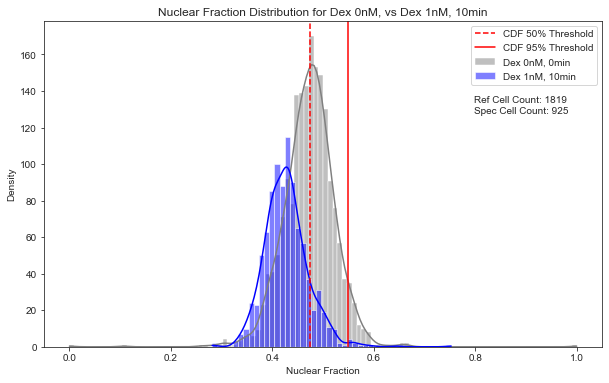

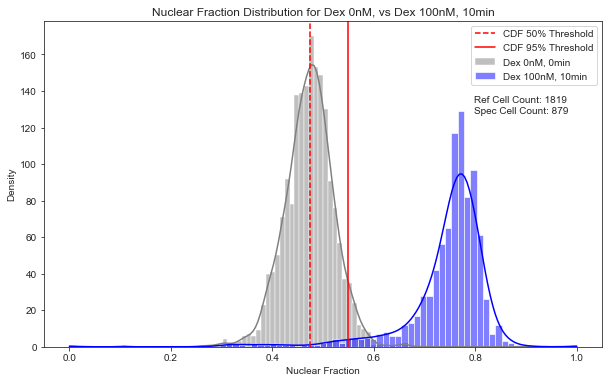

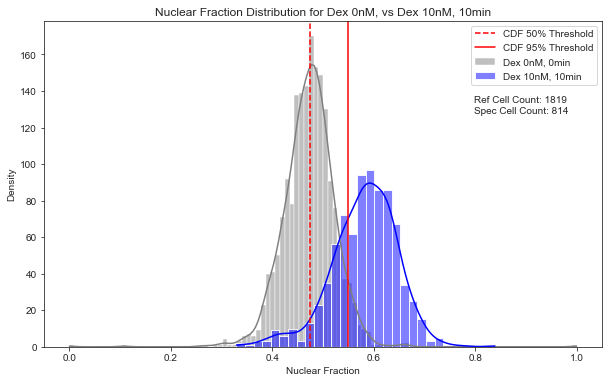

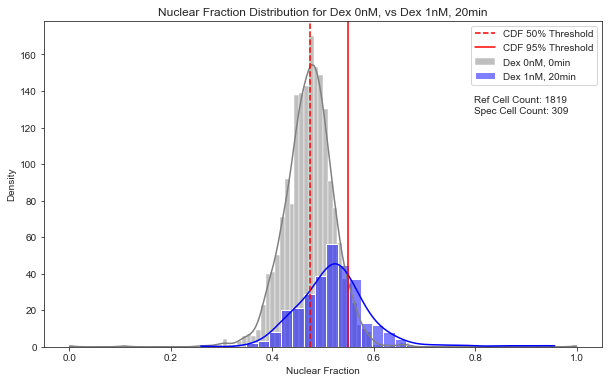

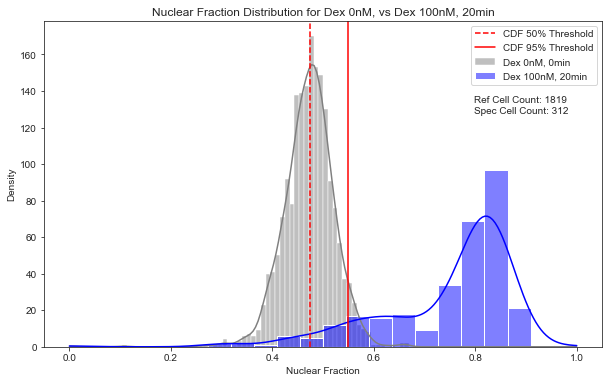

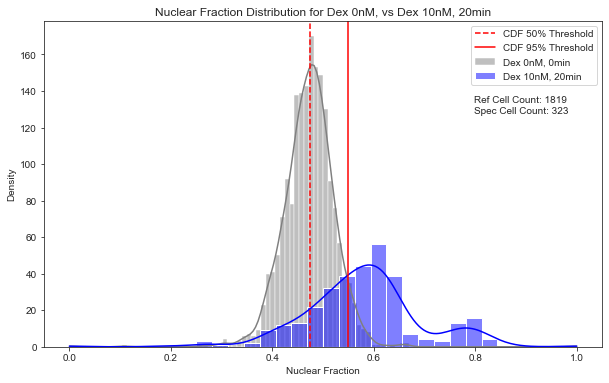

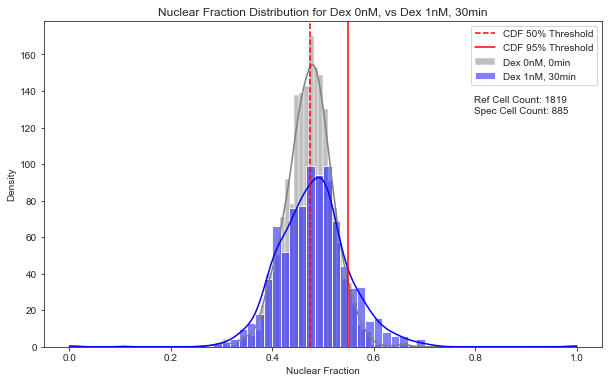

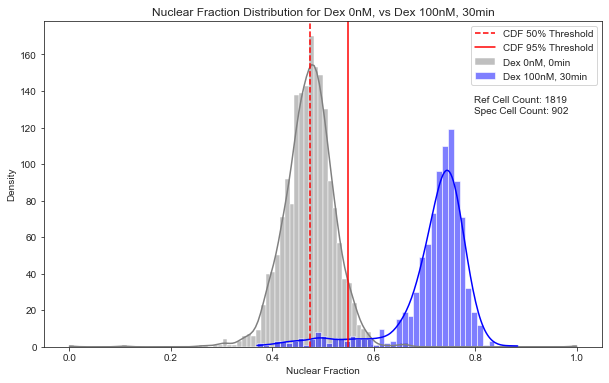

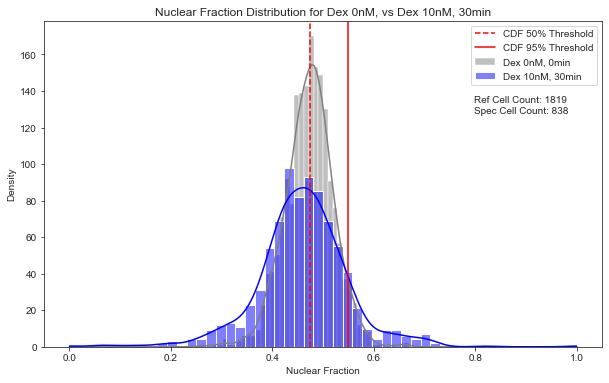

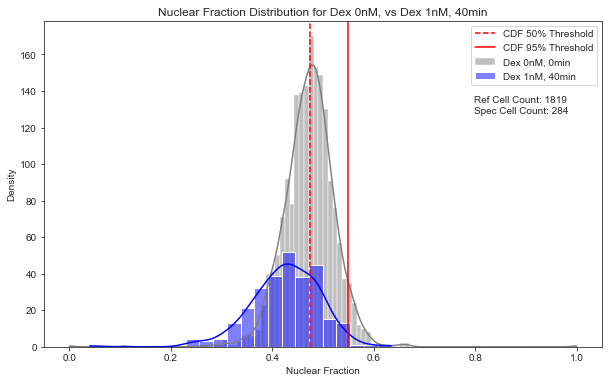

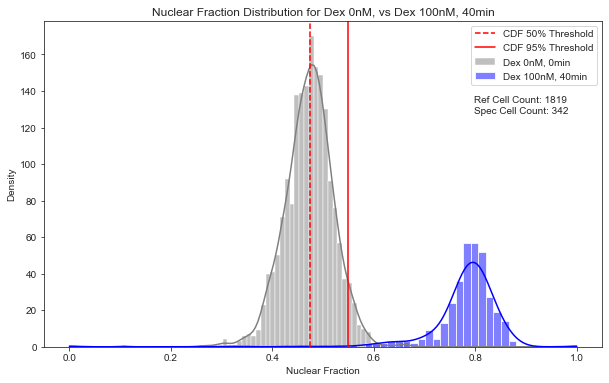

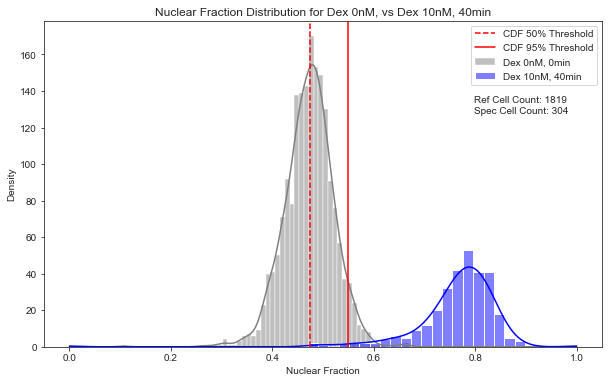

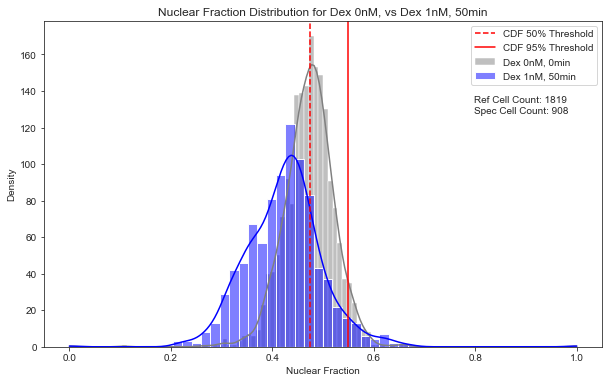

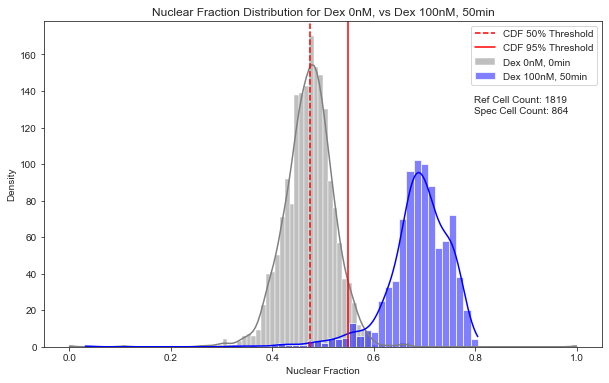

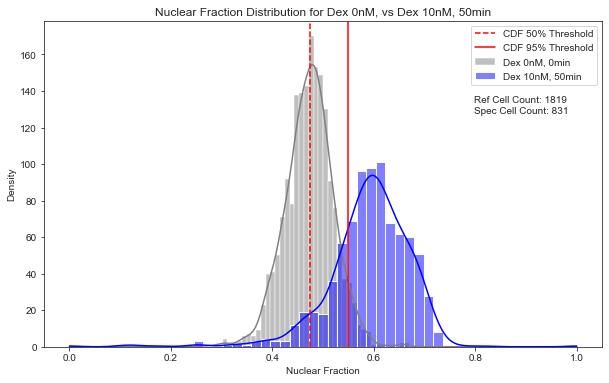

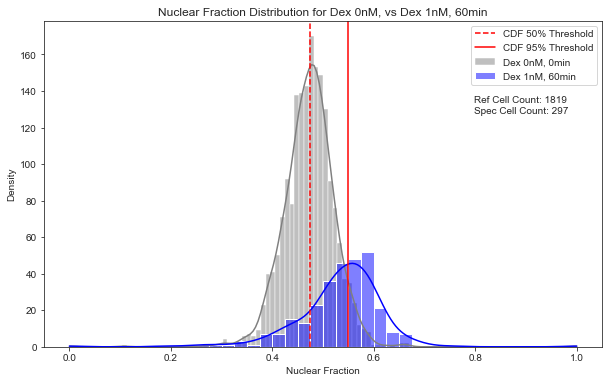

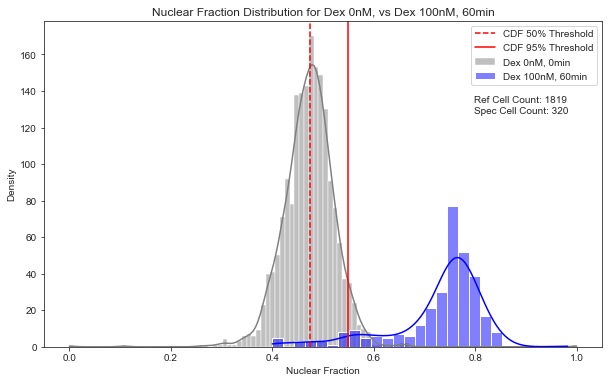

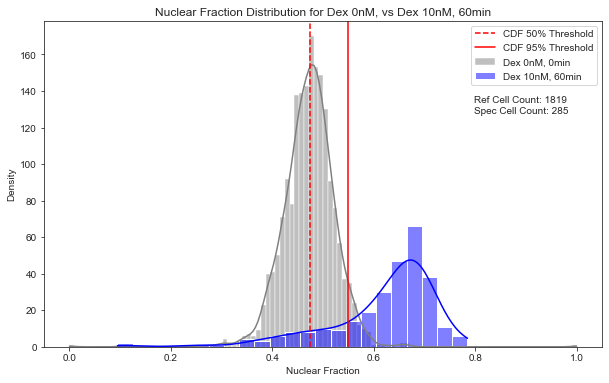

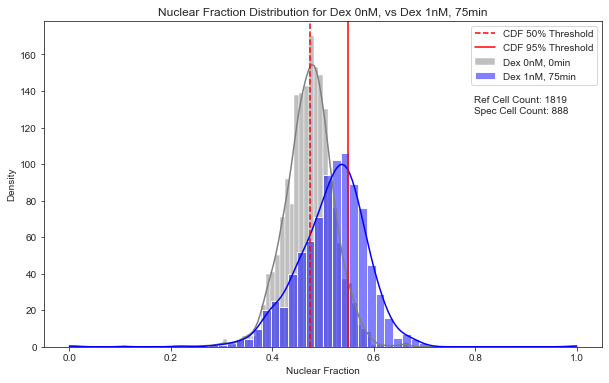

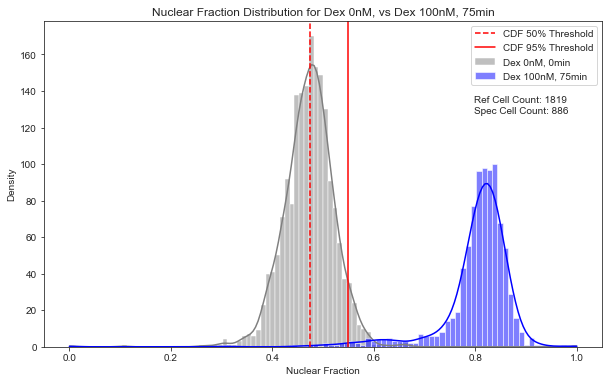

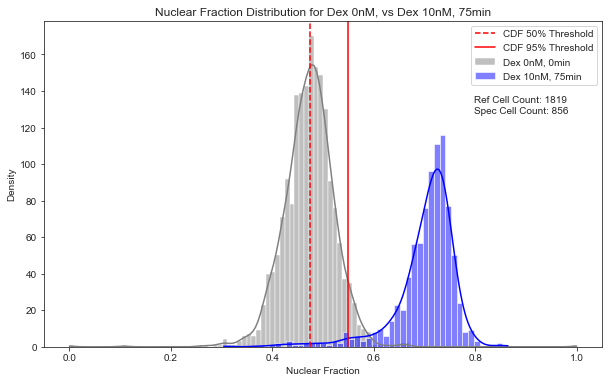

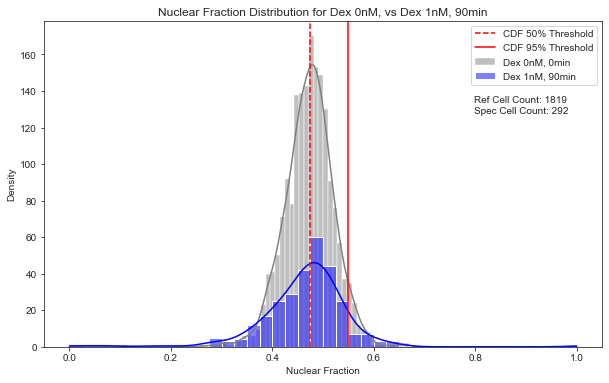

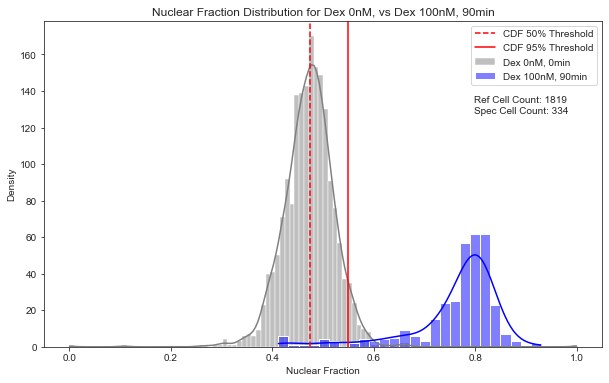

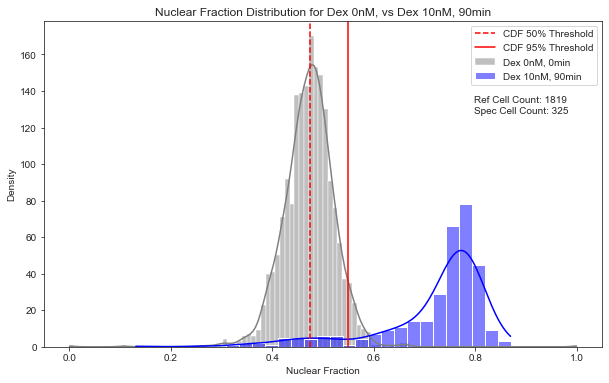

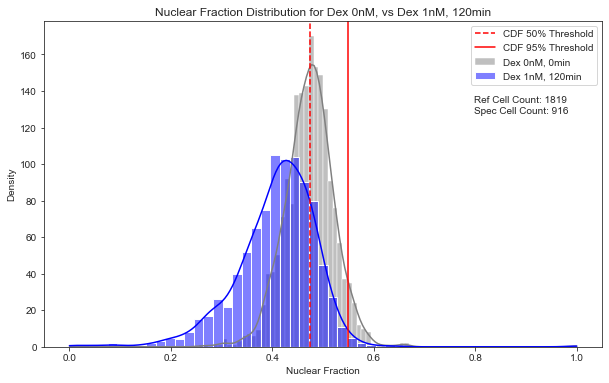

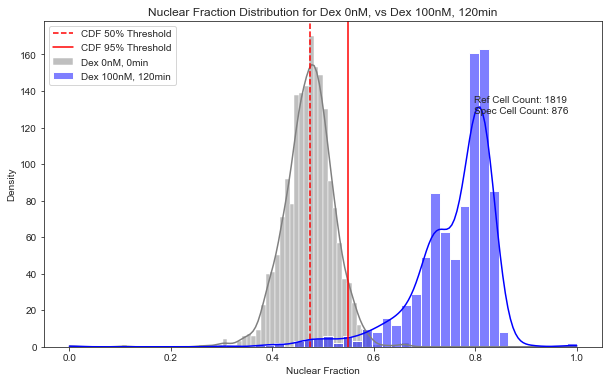

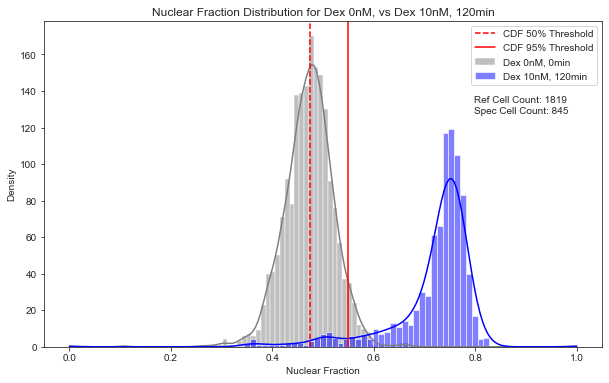

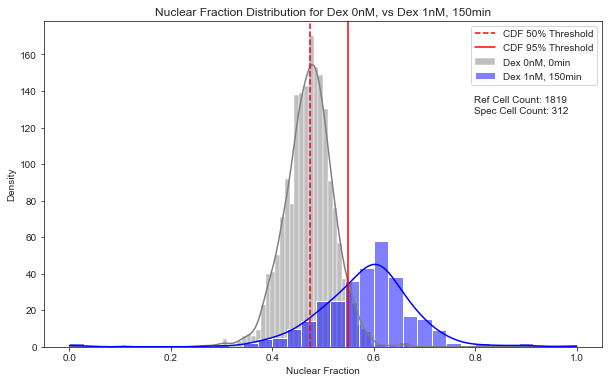

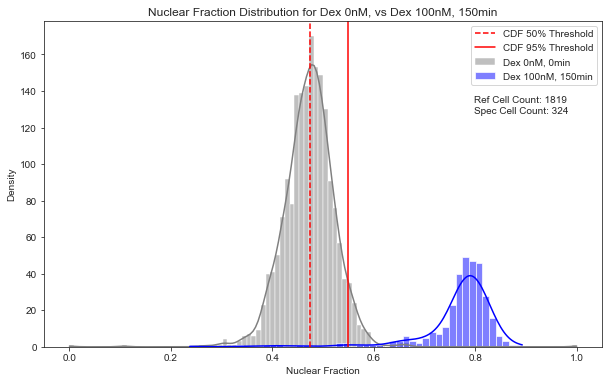

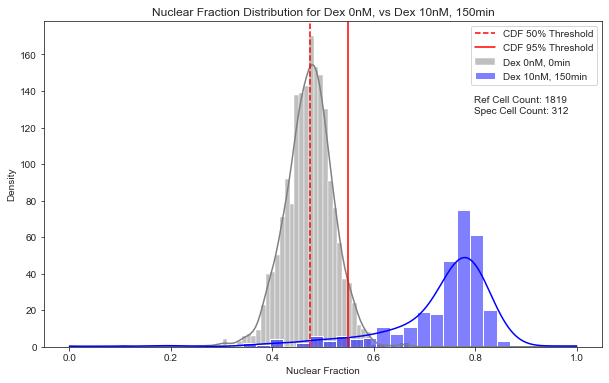

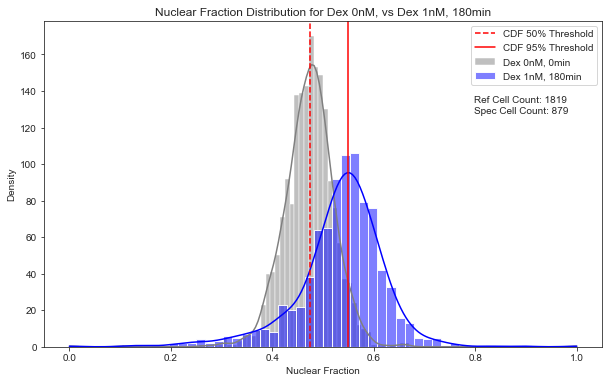

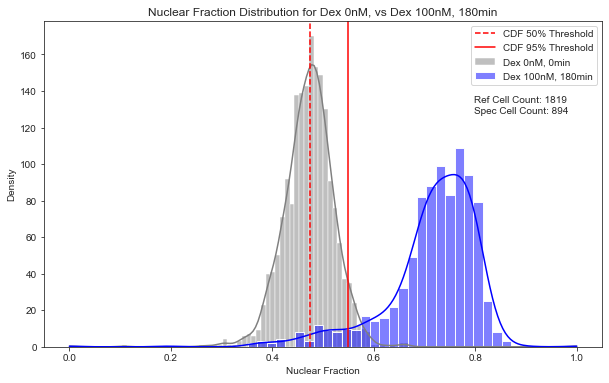

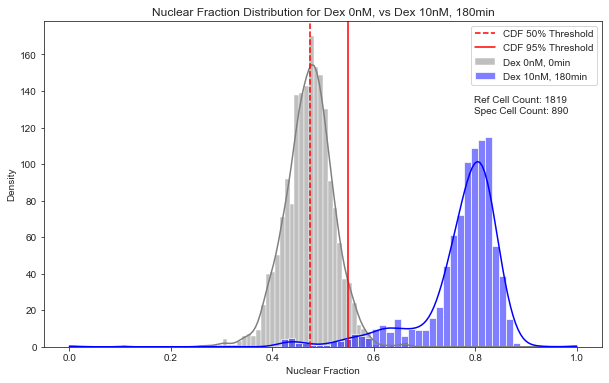

In [10]:
'''This code will generate a series of plots, each comparing the ECDF of normalized nuclear fraction for 
a specific dexamethasone concentration and time point against the 0nM, 0min reference.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = normalized_df.copy()

# Get the reference data for 0min control
reference_data = df[(df['Dex_Conc'] == 0) & (df['time_index'] == 0)]

# Calculate CDF thresholds for reference data
cdf_values = np.sort(reference_data['Normalized_nuclear_fraction'])
cdf = np.arange(1, len(cdf_values) + 1) / len(cdf_values)
cdf_50_threshold = np.interp(0.50, cdf, cdf_values)
cdf_95_threshold = np.interp(0.95, cdf, cdf_values)

# Get unique time points and concentrations
unique_time_indices = df['time_index'].unique()
unique_dex_concs = df['Dex_Conc'].unique()

# Exclude the reference group
unique_time_indices = unique_time_indices[unique_time_indices != 0]
unique_dex_concs = unique_dex_concs[unique_dex_concs != 0]

for time_index in unique_time_indices:
    for dex_conc in unique_dex_concs:
        plt.figure(figsize=(10, 6))
        specific_data = df[(df['Dex_Conc'] == dex_conc) & (df['time_index'] == time_index)]
        # reference_fano_factor = np.var(reference_data['Normalized_nuclear_fraction']) / np.mean(reference_data['Normalized_nuclear_fraction'])
        # specific_fano_factor = np.var(specific_data['Normalized_nuclear_fraction']) / np.mean(specific_data['Normalized_nuclear_fraction'])

        sns.histplot(reference_data['Normalized_nuclear_fraction'], color='grey', label='Dex 0nM, 0min', kde=True)
        sns.histplot(specific_data['Normalized_nuclear_fraction'], color='blue', label=f'Dex {dex_conc}nM, {time_index}min', kde=True)
        plt.axvline(cdf_50_threshold, color='red', linestyle='--', label='CDF 50% Threshold')
        plt.axvline(cdf_95_threshold, color='red', linestyle='-', label='CDF 95% Threshold')

        # Annotate the plot with the Fano factor and number of cells
        plt.annotate(#f'Ref Fano Factor: {reference_fano_factor:.2f}\n' +
                     #f'Spec Fano Factor: {specific_fano_factor:.2f}\n' +
                     f'Ref Cell Count: {len(reference_data)}\n' +
                     f'Spec Cell Count: {len(specific_data)}',
                     xy=(0.77, 0.77), xycoords='axes fraction', verticalalignment='top')

        plt.title(f'Nuclear Fraction Distribution for Dex 0nM, vs Dex {dex_conc}nM, {time_index}min')
        plt.xlabel('Nuclear Fraction')
        plt.ylabel('Density')
        plt.legend()
        plt.show()


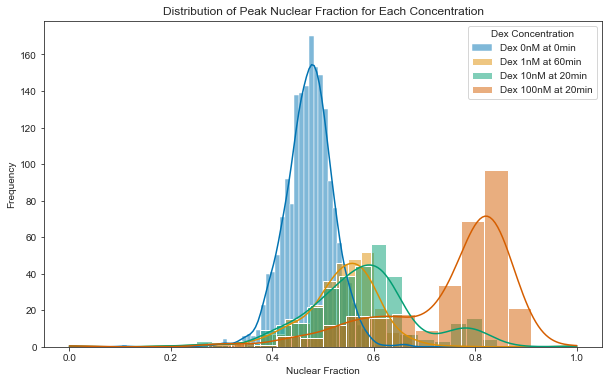

In [11]:
# Find the time point with the maximum nuclear_fraction for each concentration
peak_points = normalized_df.loc[normalized_df.groupby('Dex_Conc')['Normalized_nuclear_fraction'].idxmax()]

# Now let's plot the histograms with KDE for each concentration peak
plt.figure(figsize=(10, 6))

# Define a color palette for the different concentrations
palette = sns.color_palette("colorblind", len(peak_points['Dex_Conc'].unique()))

# Plot each concentration's histogram and KDE
for (idx, peak), color in zip(peak_points.iterrows(), palette):
    # Filter the data for the concentration and the peak time index
    subset = normalized_df[(normalized_df['Dex_Conc'] == peak['Dex_Conc']) & (normalized_df['time_index'] == peak['time_index'])]
    sns.histplot(subset['Normalized_nuclear_fraction'], kde=True, color=color, label=f"Dex {peak['Dex_Conc']}nM at {peak['time_index']}min")

plt.title('Distribution of Peak Nuclear Fraction for Each Concentration')
plt.xlabel('Nuclear Fraction')
plt.ylabel('Frequency')
plt.legend(title='Dex Concentration')
plt.show()

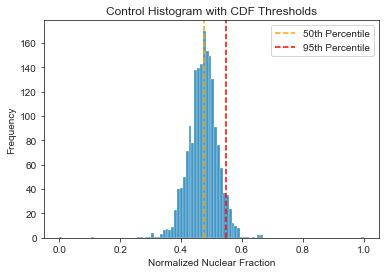

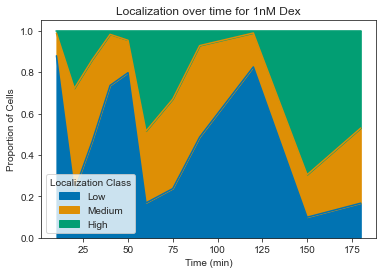

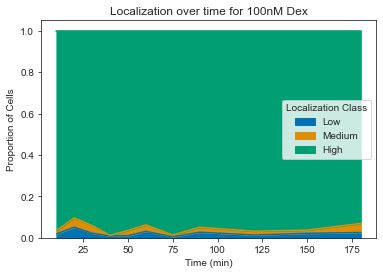

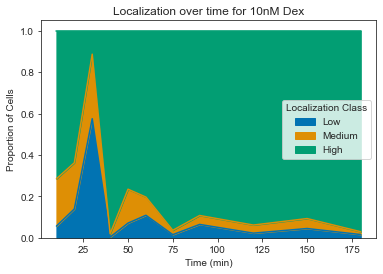

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the color palette to "colorblind"
sns.set_palette("colorblind")

# Corrected plot_localization function
def plot_localization(df, concentration, cdf_50_threshold=None, cdf_95_threshold=None, localization_order=None):
    if concentration == 0:
        # Plot a histogram with CDF thresholds for control group
        sns.histplot(df['Normalized_nuclear_fraction'], kde=False)
        plt.axvline(x=cdf_50_threshold, color='orange', linestyle='--', label='50th Percentile')
        plt.axvline(x=cdf_95_threshold, color='red', linestyle='--', label='95th Percentile')
        plt.legend()
        plt.title('Control Histogram with CDF Thresholds')
        plt.xlabel('Normalized Nuclear Fraction')
        plt.ylabel('Frequency')
    else:
        # For other concentrations, plot a stacked area chart
        pivot_table = df.pivot_table(values='cell_id',
                                     index='time_index',
                                     columns='localization_class',
                                     aggfunc='count').fillna(0)
        if localization_order:
            pivot_table = pivot_table.reindex(columns=localization_order)
        pivot_table_prop = pivot_table.div(pivot_table.sum(axis=1), axis=0)
        pivot_table_prop.plot(kind='area', stacked=True)
        plt.title(f'Localization over time for {concentration}nM Dex')
        plt.xlabel('Time (min)')
        plt.ylabel('Proportion of Cells')
        plt.legend(title='Localization Class')
    plt.show()

# Define 'control_data', 'cdf_50_threshold', and 'cdf_95_threshold' based on your actual control group data
control_data = normalized_df[(normalized_df['time_index'] == 0) & (normalized_df['Dex_Conc'] == 0)]
control_nuc_frac = control_data['Normalized_nuclear_fraction']
cdf_values = np.sort(control_nuc_frac)
cdf = np.arange(1, len(cdf_values) + 1) / len(cdf_values)
cdf_50_threshold = np.interp(0.50, cdf, cdf_values)
cdf_95_threshold = np.interp(0.95, cdf, cdf_values)
localization_order = ['Low', 'Medium', 'High']  # Define the order of localization classes

# Plot the histogram for the control group
plot_localization(control_data, 0, cdf_50_threshold, cdf_95_threshold, localization_order)

# For other concentrations, call the plot_localization function with the appropriate data
for concentration in normalized_df['Dex_Conc'].unique():
    if concentration != 0:
        concentration_data = normalized_df[normalized_df['Dex_Conc'] == concentration]
        plot_localization(concentration_data, concentration, cdf_50_threshold, cdf_95_threshold, localization_order)


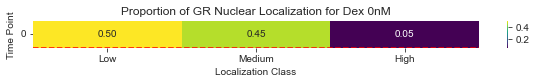

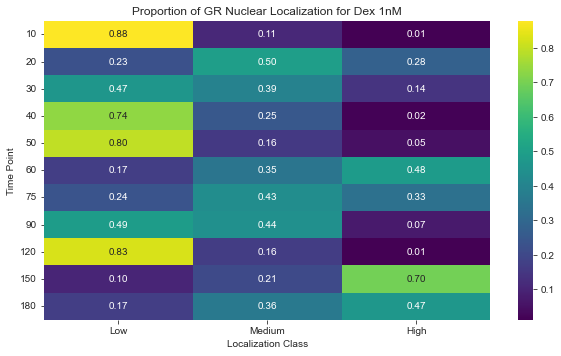

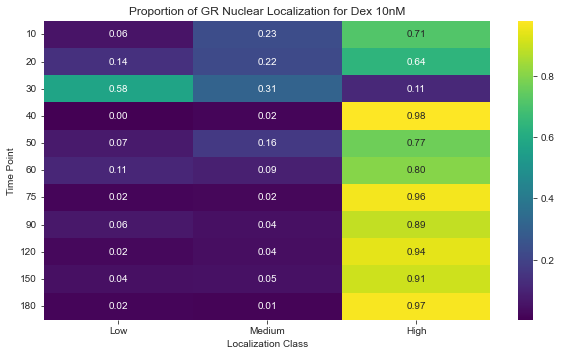

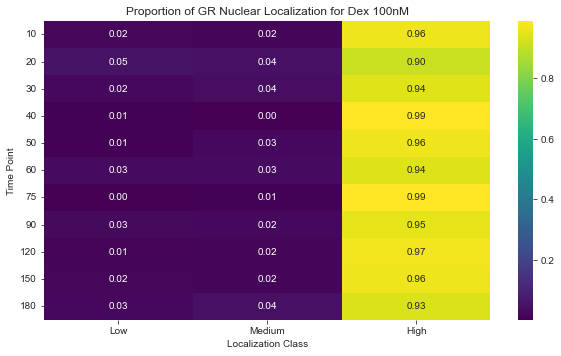

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming classification_proportions is your DataFrame
unique_concentrations = classification_proportions.index.get_level_values('Dex_Conc').unique()
localization_order = ['Low', 'Medium', 'High']  # Define the desired order

for conc in unique_concentrations:
    # Filter the DataFrame for each concentration
    conc_data = classification_proportions.xs(conc, level='Dex_Conc')

    # Reindex the columns to ensure the order is Low, Medium, High
    conc_data = conc_data.reindex(localization_order, axis=1)

    # Plotting the heatmap
    plt.figure(figsize=(10, len(conc_data)*0.5))  # Adjust the height based on the number of time points
    sns.heatmap(conc_data, annot=True, cmap="viridis", fmt=".2f")

    # Highlighting the 0min time point
    if (0, conc) in classification_proportions.index:
        plt.axhline(1, color='red', linestyle='--')  # Assuming the 0min time point is the first row

    plt.title(f'Proportion of GR Nuclear Localization for Dex {conc}nM')
    plt.xlabel('Localization Class')
    plt.ylabel('Time Point')
    plt.yticks(rotation=0)
    plt.show()


<Figure size 432x288 with 0 Axes>

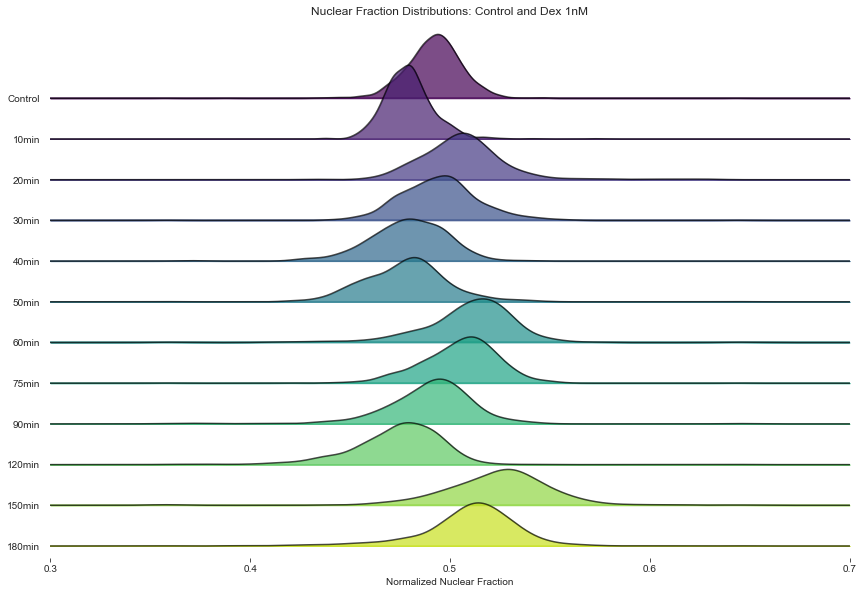

<Figure size 432x288 with 0 Axes>

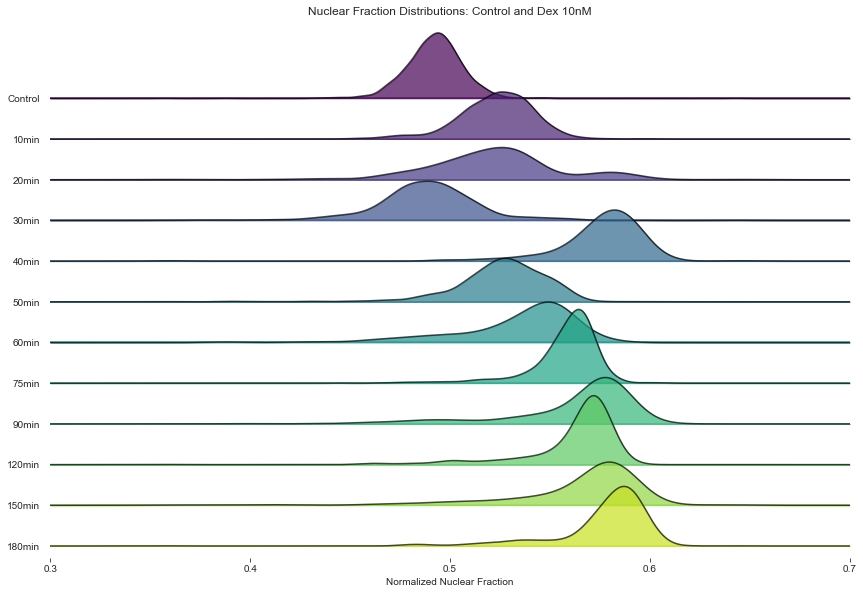

<Figure size 432x288 with 0 Axes>

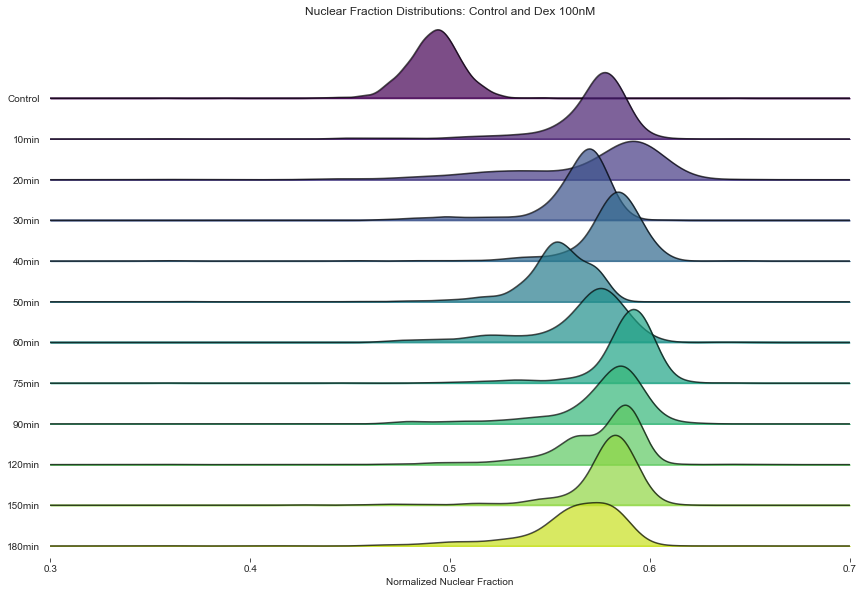

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot
import numpy as np

df = normalized_df.copy()  

# Define the list of labels for the concentration plots
ordered_labels = ['Control', '10min', '20min', '30min', '40min', '50min', '60min', '75min', '90min', '120min', '150min', '180min']

# Create a mapping from time_index to labels
time_index_to_label = {0: 'Control', 10: '10min', 20: '20min', 30: '30min', 40: '40min', 50: '50min',
                       60: '60min', 75: '75min', 90: '90min', 120: '120min', 150: '150min', 180: '180min'}

# Map the labels to the dataframe for all rows
df['Label'] = df['time_index'].map(time_index_to_label)

# Convert the 'Label' column to a categorical type with the specified order
df['Label'] = pd.Categorical(df['Label'], categories=ordered_labels, ordered=True)

# Extract the control data
control_data = df[(df['Dex_Conc'] == 0) & (df['time_index'] == 0)].copy()

# Set the x-axis limits
x_min = 0.3
x_max = 0.7

# Define the tick marks
ticks = np.linspace(x_min, x_max, 5)  # 5 evenly spaced ticks from 0.3 to 0.7

# Define concentrations to plot
concentrations_to_plot = [1, 10, 100]

# Concatenate the control data with each concentration data
plot_datas = [pd.concat([control_data, df[(df['Dex_Conc'] == conc) & (df['time_index'] != 0)]]) for conc in concentrations_to_plot]

# Create the joyplots for each concatenated data
for plot_data, conc in zip(plot_datas, concentrations_to_plot):
    plt.figure()
    joyplot(
        data=plot_data[['Label', 'Normalized_nuclear_fraction']], 
        by='Label',
        figsize=(12, 8),
        alpha=0.7,
        colormap=plt.cm.viridis
    )
    plt.title(f'Nuclear Fraction Distributions: Control and Dex {conc}nM')
    plt.xlabel('Normalized Nuclear Fraction')
    plt.xlim(x_min, x_max)  # Set the x-axis limits for all plots
    plt.xticks(ticks)  # Set the x-axis ticks for all plots
    plt.show()


<Figure size 432x288 with 0 Axes>

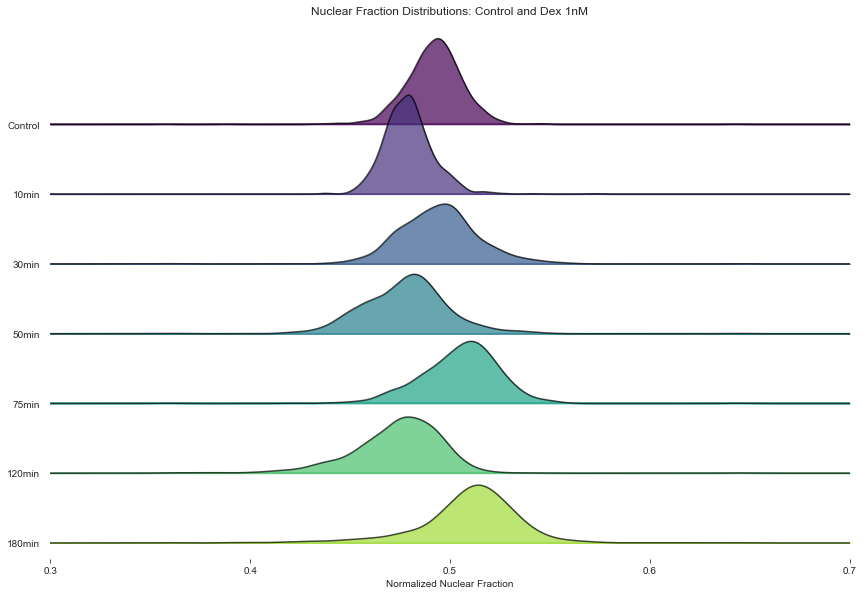

<Figure size 432x288 with 0 Axes>

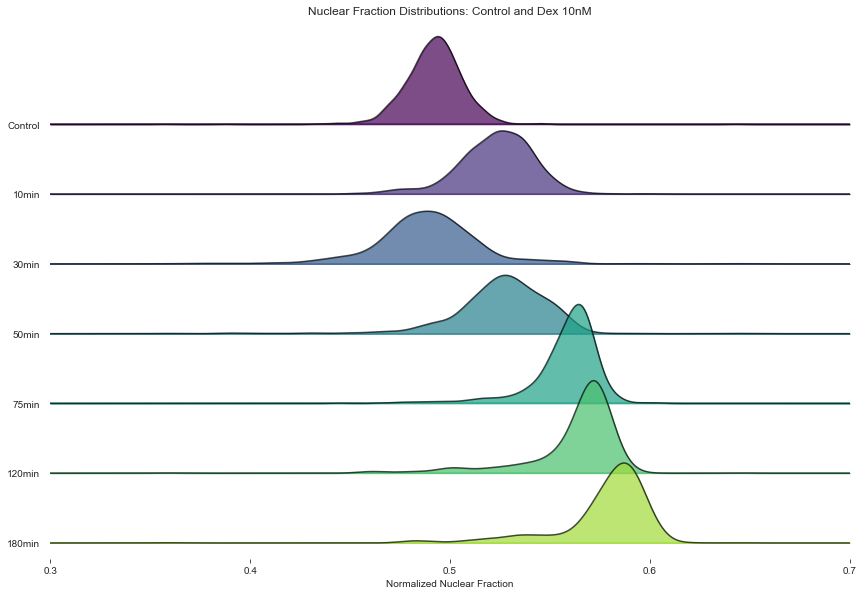

<Figure size 432x288 with 0 Axes>

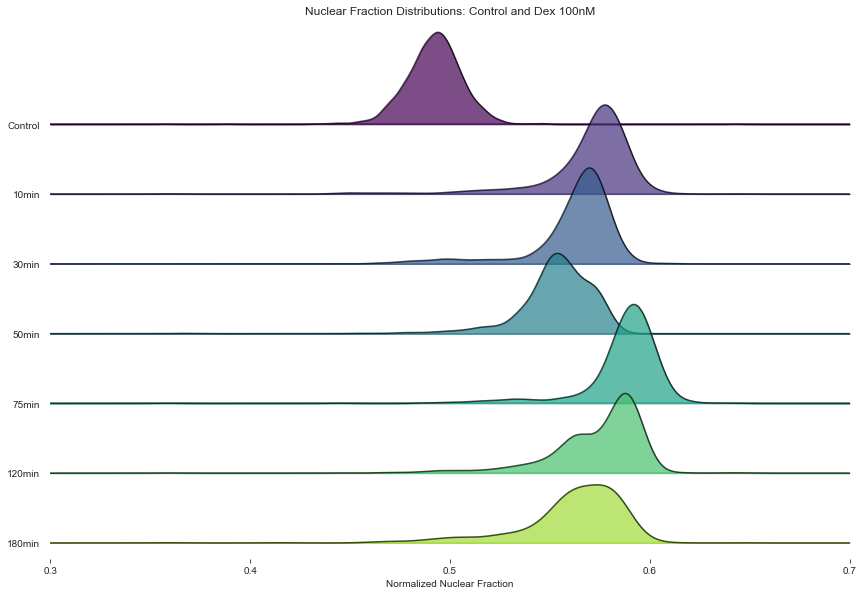

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot
import numpy as np

df = normalized_df.copy()  

# Define the list of labels for the concentration plots
ordered_labels = ['Control', '10min', '30min', '50min', '75min', '120min', '180min']

# Create a mapping from time_index to labels
time_index_to_label = {0: 'Control', 10: '10min', 30: '30min', 50: '50min', 75: '75min',  120: '120min',  180: '180min'}

# Map the labels to the dataframe for all rows
df['Label'] = df['time_index'].map(time_index_to_label)

# Convert the 'Label' column to a categorical type with the specified order
df['Label'] = pd.Categorical(df['Label'], categories=ordered_labels, ordered=True)

# Extract the control data
control_data = df[(df['Dex_Conc'] == 0) & (df['time_index'] == 0)].copy()

# Set the x-axis limits
x_min = 0.3
x_max = 0.7

# Define the tick marks
ticks = np.linspace(x_min, x_max, 5)  # 5 evenly spaced ticks from 0.3 to 0.7

# Define concentrations to plot
concentrations_to_plot = [1, 10, 100]

# Concatenate the control data with each concentration data
plot_datas = [pd.concat([control_data, df[(df['Dex_Conc'] == conc) & (df['time_index'] != 0)]]) for conc in concentrations_to_plot]

# Create the joyplots for each concatenated data
for plot_data, conc in zip(plot_datas, concentrations_to_plot):
    plt.figure()
    joyplot(
        data=plot_data[['Label', 'Normalized_nuclear_fraction']], 
        by='Label',
        figsize=(12, 8),
        alpha=0.7,
        colormap=plt.cm.viridis
    )
    plt.title(f'Nuclear Fraction Distributions: Control and Dex {conc}nM')
    plt.xlabel('Normalized Nuclear Fraction')
    plt.xlim(x_min, x_max)  # Set the x-axis limits for all plots
    plt.xticks(ticks)  # Set the x-axis ticks for all plots
    plt.show()


## Nuclear Cytoplasmic Ratio

<Figure size 432x288 with 0 Axes>

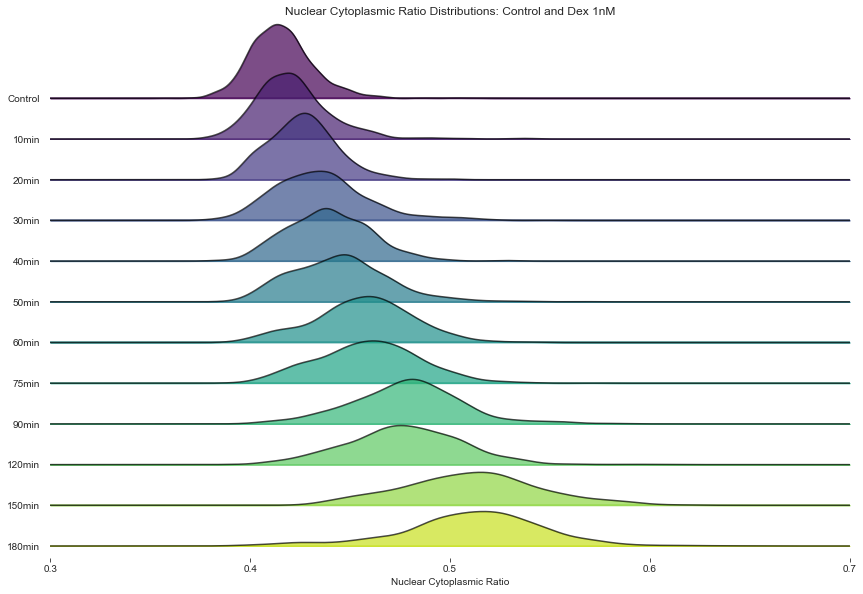

<Figure size 432x288 with 0 Axes>

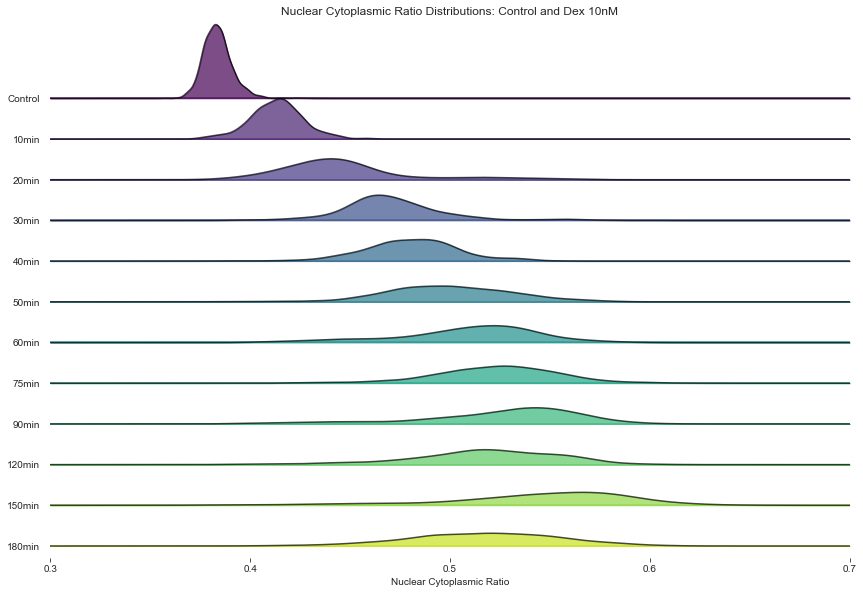

<Figure size 432x288 with 0 Axes>

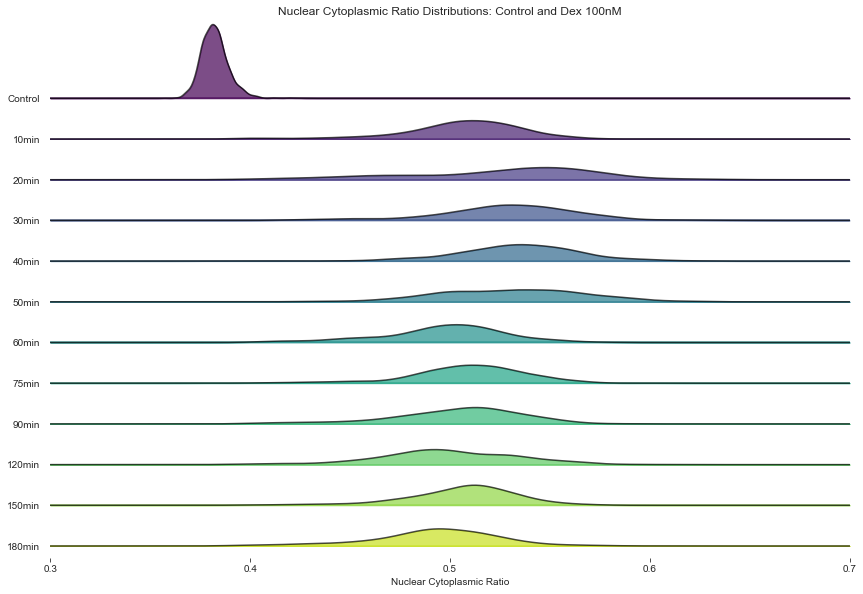

In [16]:
# Nuclar Ratio 

df = normalized_df.copy()  

# Define the list of labels for the concentration plots
ordered_labels = ['Control', '10min', '20min', '30min', '40min', '50min', '60min', '75min', '90min', '120min', '150min', '180min']

# Create a mapping from time_index to labels
time_index_to_label = {0: 'Control', 10: '10min', 20: '20min', 30: '30min', 40: '40min', 50: '50min',
                       60: '60min', 75: '75min', 90: '90min', 120: '120min', 150: '150min', 180: '180min'}

# Map the labels to the dataframe for all rows
df['Label'] = df['time_index'].map(time_index_to_label)

# Convert the 'Label' column to a categorical type with the specified order
df['Label'] = pd.Categorical(df['Label'], categories=ordered_labels, ordered=True)

# Extract the control data
control_data = df[(df['Dex_Conc'] == 0) & (df['time_index'] == 0)].copy()

# Set the x-axis limits
x_min = 0.3
x_max = 0.7

# Define the tick marks
ticks = np.linspace(x_min, x_max, 5)  # 5 evenly spaced ticks from 0.3 to 0.7

# Define concentrations to plot
concentrations_to_plot = [1, 10, 100]

# Concatenate the control data with each concentration data
plot_datas = [pd.concat([control_data, df[(df['Dex_Conc'] == conc) & (df['time_index'] != 0)]]) for conc in concentrations_to_plot]

# Create the joyplots for each concatenated data
for plot_data, conc in zip(plot_datas, concentrations_to_plot):
    plt.figure()
    joyplot(
        data=plot_data[['Label', 'nuc_cyto_ratio']], 
        by='Label',
        figsize=(12, 8),
        alpha=0.7,
        colormap=plt.cm.viridis
    )
    plt.title(f'Nuclear Cytoplasmic Ratio Distributions: Control and Dex {conc}nM')
    plt.xlabel('Nuclear Cytoplasmic Ratio')
    plt.xlim(x_min, x_max)  # Set the x-axis limits for all plots
    plt.xticks(ticks)  # Set the x-axis ticks for all plots
    plt.show()


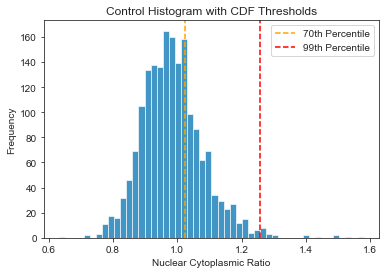

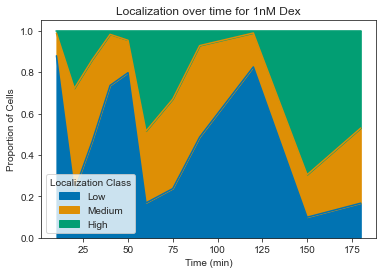

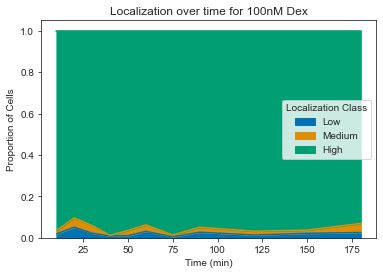

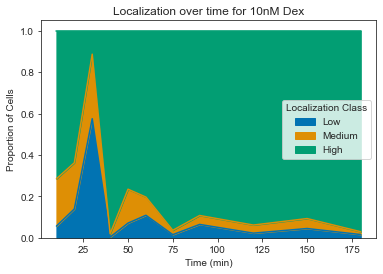

In [20]:
df = normalized_df.copy() 

# Set the color palette to "colorblind"
sns.set_palette("colorblind")

# Corrected plot_localization function
def plot_localization(df, concentration, cdf_70_threshold=None, cdf_99_threshold=None, localization_order=None):
    if concentration == 0:
        # Plot a histogram with CDF thresholds for control group
        sns.histplot(df['nuc_cyto_ratio'], kde=False)
        plt.axvline(x=cdf_70_threshold, color='orange', linestyle='--', label='70th Percentile')
        plt.axvline(x=cdf_99_threshold, color='red', linestyle='--', label='99th Percentile')
        plt.legend()
        plt.title('Control Histogram with CDF Thresholds')
        plt.xlabel('Nuclear Cytoplasmic Ratio')
        plt.ylabel('Frequency')
    else:
        # For other concentrations, plot a stacked area chart
        pivot_table = df.pivot_table(values='cell_id',
                                     index='time_index',
                                     columns='localization_class',
                                     aggfunc='count').fillna(0)
        if localization_order:
            pivot_table = pivot_table.reindex(columns=localization_order)
        pivot_table_prop = pivot_table.div(pivot_table.sum(axis=1), axis=0)
        pivot_table_prop.plot(kind='area', stacked=True)
        plt.title(f'Localization over time for {concentration}nM Dex')
        plt.xlabel('Time (min)')
        plt.ylabel('Proportion of Cells')
        plt.legend(title='Localization Class')
    plt.show()

# Define 'control_data', 'cdf_70_threshold', and 'cdf_95_threshold' based on your actual control group data
control_data = normalized_df[(normalized_df['time_index'] == 0) & (normalized_df['Dex_Conc'] == 0)]
control_nuc_frac = control_data['nuc_cyto_ratio']
cdf_values = np.sort(control_nuc_frac)
cdf = np.arange(1, len(cdf_values) + 1) / len(cdf_values)
cdf_70_threshold = np.interp(0.70, cdf, cdf_values)
cdf_99_threshold = np.interp(0.99, cdf, cdf_values)
localization_order = ['Low', 'Medium', 'High']  # Define the order of localization classes

# Plot the histogram for the control group
plot_localization(control_data, 0, cdf_70_threshold, cdf_99_threshold, localization_order)

# For other concentrations, call the plot_localization function with the appropriate data
for concentration in normalized_df['Dex_Conc'].unique():
    if concentration != 0:
        concentration_data = normalized_df[normalized_df['Dex_Conc'] == concentration]
        plot_localization(concentration_data, concentration, cdf_70_threshold, cdf_99_threshold, localization_order)


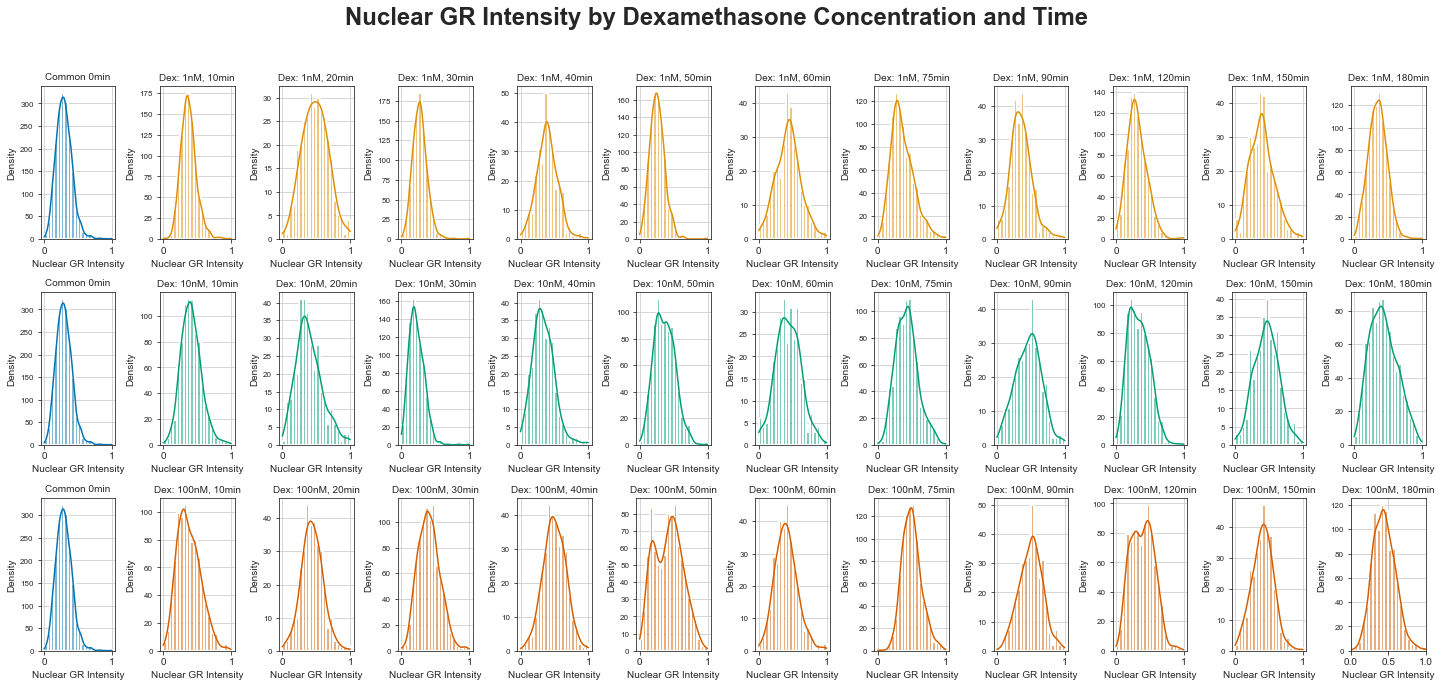

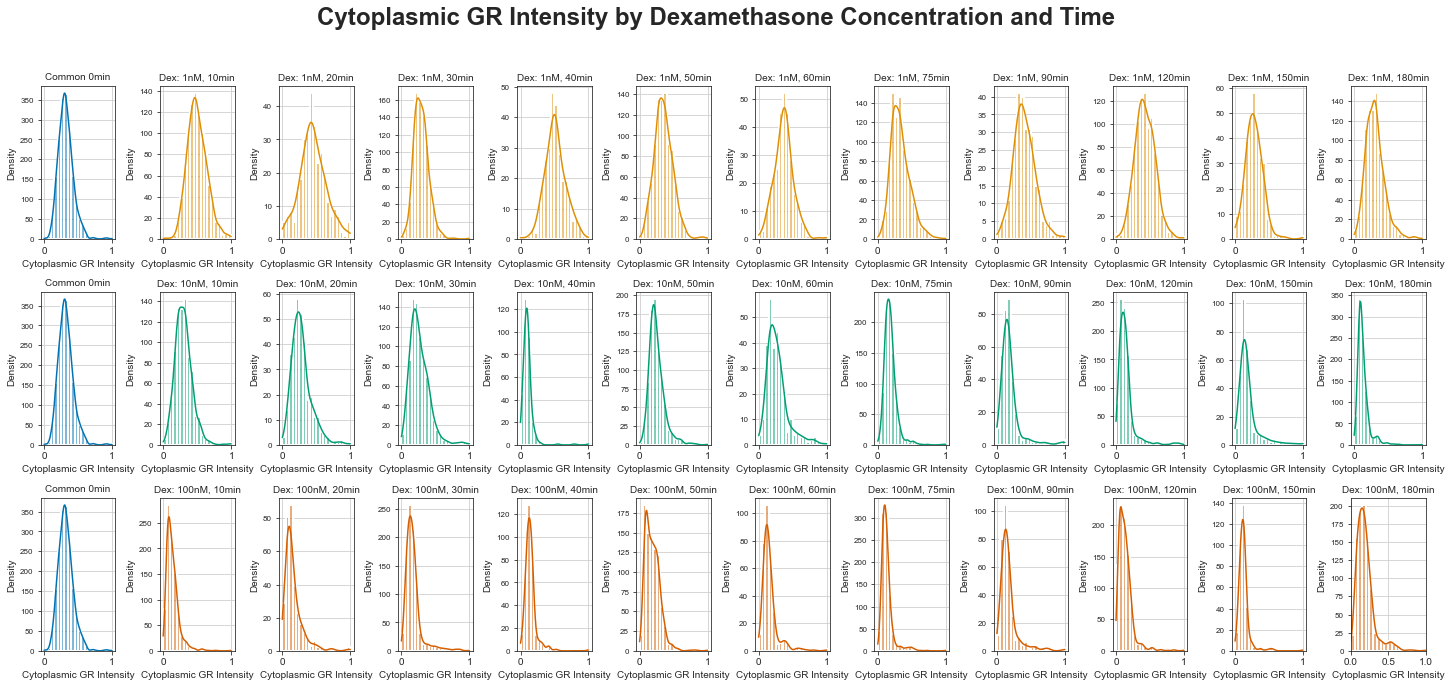

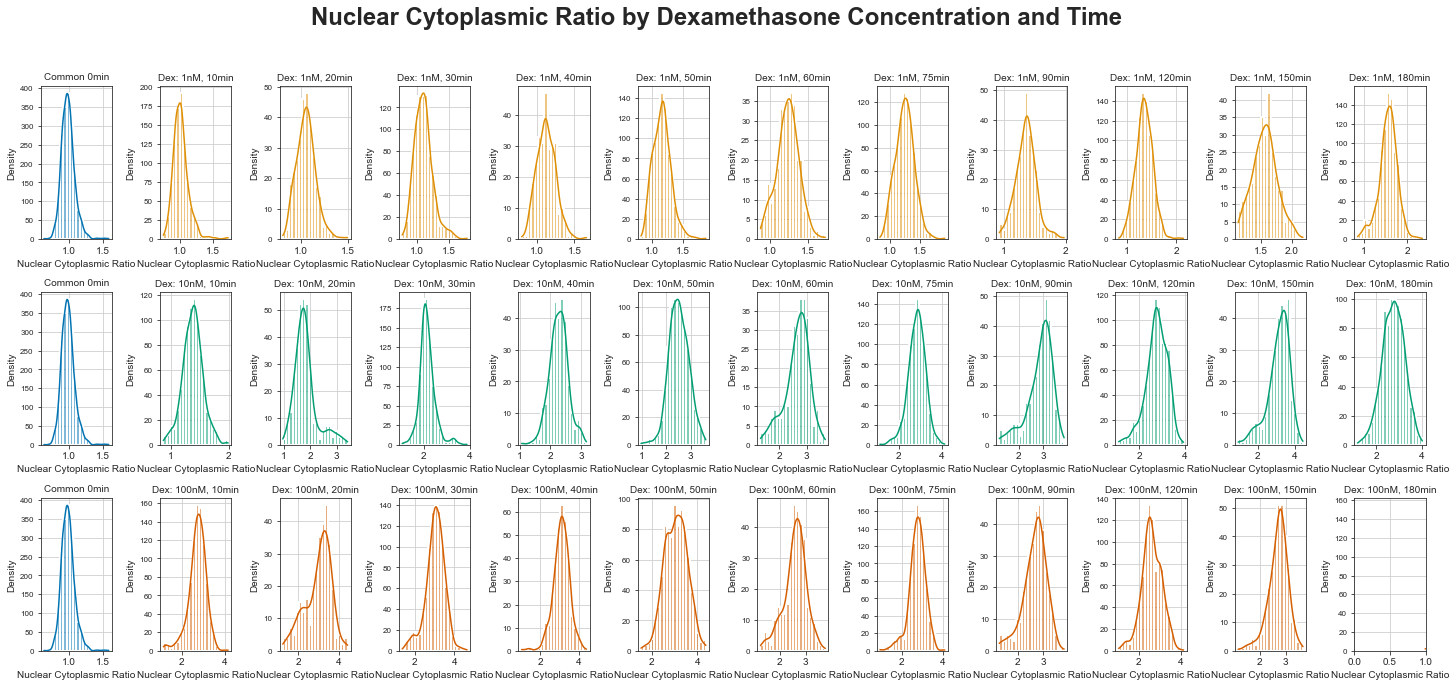

In [18]:
## GR Histograms for 'nuc_intensity', 'cyto_intensity', 'nuc_cyto_ratio', and 'nuclear_fraction' ##

df = normalized_df.copy() 

# Set the Seaborn style
sns.set_style("ticks")

# Define the number of unique concentrations you have (including the common 0 concentration)
num_concentrations = 4  # 0, 1, 10, 100

# Get unique values for time_index and count them for num_cols
unique_time_indices = normalized_df['time_index'].unique()
num_cols = len(unique_time_indices)

# Since we are plotting 3 concentrations (1, 10, 100) 
num_rows = 3

# Generate colors from the Seaborn colorblind palette
colors = sns.color_palette("colorblind", num_concentrations)

# Map these colors to your concentrations
concentration_color_map = dict(zip([0, 1, 10, 100], colors))

# Get unique values for time_index
unique_time_indices = normalized_df['time_index'].unique()

# Concentrations to plot (excluding 0, as it will be included as the first timepoint)
concentrations = [1, 10, 100]

# Metrics to plot and their corresponding labels
metrics = ['normalized_nuc_intensity', 'normalized_cyto_intensity', 'nuc_cyto_ratio']
labels = {
    'normalized_nuc_intensity': 'Nuclear GR Intensity',
    'normalized_cyto_intensity': 'Cytoplasmic GR Intensity',
    'nuc_cyto_ratio': 'Nuclear Cytoplasmic Ratio'
}

# Define the number of unique concentrations and time indices
num_concentrations = 3  # 0, 1, 10, 100
unique_time_indices = normalized_df['time_index'].unique()
num_cols = len(unique_time_indices)
num_rows = num_concentrations

# Loop over each metric and create a separate plot
for metric in metrics:
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust the figure size as needed

    for i, conc in enumerate(concentrations):
        for j, time_index in enumerate(unique_time_indices):
            if j == 0:
                data_subset = normalized_df[(normalized_df['Dex_Conc'] == 0) & (normalized_df['time_index'] == 0)]
                color = concentration_color_map[0]
            else:
                data_subset = normalized_df[(normalized_df['Dex_Conc'] == conc) & (normalized_df['time_index'] == time_index)]
                color = concentration_color_map[conc]

            ax = axes[i, j]
            sns.histplot(data=data_subset, x=metric, kde=True, color=color, linewidth=2.0, bins=20, ax=ax)

            ax.set_title(f"Dex: {conc}nM, {time_index}min" if j != 0 else "Common 0min", fontsize=10)
            ax.set_xlabel(labels[metric])
            ax.set_ylabel('Density')
            ax.grid(True)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=8)

    plt.suptitle(f"{labels[metric]} by Dexamethasone Concentration and Time", fontsize=24, fontweight='bold')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.xlim(0,1)
    plt.show()
